In [8]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import math
from imutils.object_detection import non_max_suppression
# print(cv2.getBuildInformation())

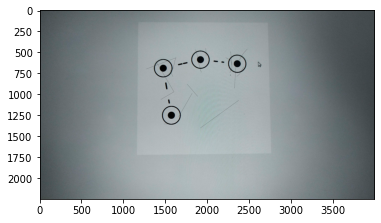

In [9]:
img = cv2.imread("test4.png")
# template = cv2.imread("template.png")
plt.imshow(img)

In [10]:
###
#finds detectors and returns detector contours and visualization image
###
def find_detectors(code_image,visualize = False):
    image = code_image.copy()    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
    blur  = cv2.blur(gray,(12,12))
    tolerance = 1.5
    
    _,binary = cv2.threshold(blur,150,255,cv2.THRESH_BINARY)

    regions, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    ###
    #filtering circular contours out by comparing areas
    ###
    contour_list = []
    for i in range(len(regions)):
        (x,y),radius = cv2.minEnclosingCircle(regions[i])
        center = (int(x),int(y))
        area = math.pi*(radius**2)
        cnt_area = cv2.contourArea(regions[i],True)
        if ((cnt_area/area) < tolerance ):
            contour_list.append((regions[i],i))
     ###
     #checking contour hierarchy and filtering based on circular contour in circular contour
     ###
    hierarchy = hierarchy[0]
    final_contours_rect = []
    for (region,i) in contour_list:
        x, y, w, h = cv2.boundingRect(region)
        if(hierarchy[i][2]>0): #checking child contour of this
            if(hierarchy[(hierarchy[i][2])][2]>0): #checking child contour of this
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)
                final_contours_rect.append((x,y,w,h))
                
    if(visualize):
        image = imutils.resize(image, width = int(image.shape[1] * 0.2))
        cv2.imshow("Image",image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return final_contours_rect


    
    

In [18]:
detector_contours = find_detectors(img,True)
print(detector_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[(1453, 1137, 233, 233), (1356, 579, 234, 228), (2242, 526, 228, 227), (1803, 478, 228, 228)]


In [15]:
# vid = cv2.VideoCapture(0)
  
# while(True):
      
#     # Capture the video frame
#     # by frame
#     ret, frame = vid.read()
  
#     # Display the resulting frame
#     find_detectors(frame)
#     cv2.imshow("frame",frame)
#     # the 'q' button is set as the
#     # quitting button you may use any
#     # desired button of your choice
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
  
# # After the loop release the cap object
# vid.release()
# # Destroy all the windows
# cv2.destroyAllWindows()